Reading the data

# =========================
# 1. IMPORTING LIBRARIES
# =========================

In [5]:


import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing & Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Sampling / Imbalance Handling
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline

# Model Selection, Evaluation & Hyperparameter Tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, roc_auc_score,
    balanced_accuracy_score, precision_recall_curve, f1_score, make_scorer
)

# Models
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Decomposition (not used in final code, but was imported)
from sklearn.decomposition import PCA

# Custom F1 scorer for minority class
f1_minority = make_scorer(f1_score, pos_label=1)

# =========================
# 2. LOADING & EXPLORING DATA
# =========================

In [6]:

# Specify the path to your dataset file
file_path = 'c1.csv'  # Replace with your dataset's filename

# Load the dataset into a Pandas DataFrame
data = pd.read_csv(file_path)

print("\nDataset Info:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

print("Number of rows in the dataset:", len(data))



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5359 non-null   int64  
 1   age                5359 non-null   float64
 2   avg_glucose_level  5359 non-null   float64
 3   bmi                5118 non-null   float64
 4   ever_married       5359 non-null   object 
 5   feat01             5359 non-null   float64
 6   feat02             5359 non-null   float64
 7   feat03             5359 non-null   float64
 8   feat04             5359 non-null   float64
 9   feat05             5359 non-null   float64
 10  feat06             5359 non-null   float64
 11  feat07             5359 non-null   float64
 12  feat08             5359 non-null   float64
 13  feat09             5359 non-null   float64
 14  feat10             5359 non-null   float64
 15  gender             5359 non-null   object 
 16  heart_dis


# =========================
# 3. DATA CLEANING & INITIAL PROCESSING
# =========================


In [7]:

# =========================
# 3. DATA CLEANING & INITIAL PROCESSING
# =========================

# Drop irrelevant columns
data = data.drop(columns=['id'])

print("\nData After Cleaning (head):")
data.head()


Data After Cleaning (head):


,age,avg_glucose_level,bmi,ever_married,feat01,feat02,feat03,feat04,feat05,feat06,...,feat08,feat09,feat10,gender,heart_disease,hypertension,Residence_type,smoking_status,stroke,work_type
0,75.0,219.82,29.5,Yes,0.475089,0.595032,1.230383,0.845381,1.067904,0.697787,...,1.426921,1.454747,0.441987,Female,0,1,Rural,formerly smoked,0,Self-employed
1,50.0,69.92,18.7,Yes,0.618836,0.432241,1.402145,1.191038,1.395761,0.950934,...,1.320794,0.708369,0.348898,Female,0,0,Urban,formerly smoked,0,Self-employed
2,79.0,72.73,28.4,Yes,0.421711,0.629341,0.916465,1.107330,1.335406,0.527874,...,0.669458,0.696877,0.809689,Male,0,0,Rural,never smoked,1,Private
3,3.0,78.24,16.2,No,0.482635,0.557748,0.762485,0.925121,0.975914,0.572831,...,0.420634,1.343314,0.444809,Male,0,0,Rural,Unknown,0,children
4,53.0,196.25,24.9,Yes,0.435785,0.497572,0.743418,1.007523,0.648819,0.937078,...,0.648643,1.168722,0.391860,Female,1,1,Urban,smokes,0,Private


In [8]:
# Identify numerical columns to check for outliers
numerical_cols = ['age', 'avg_glucose_level', 'bmi']


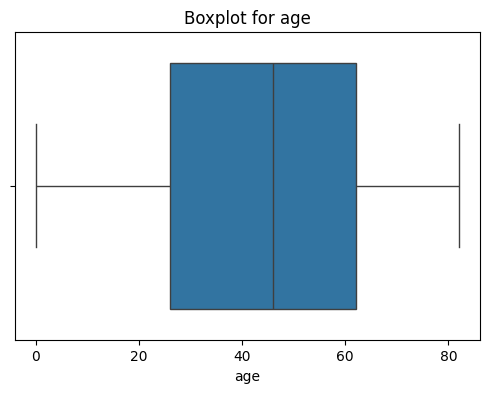

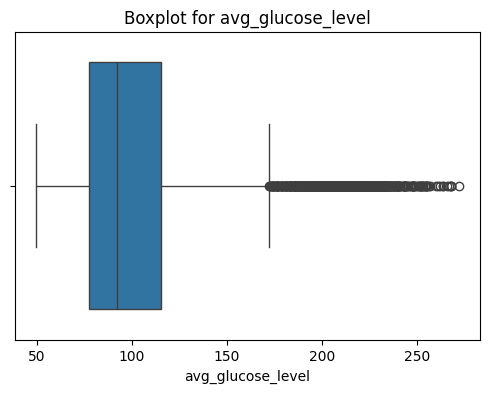

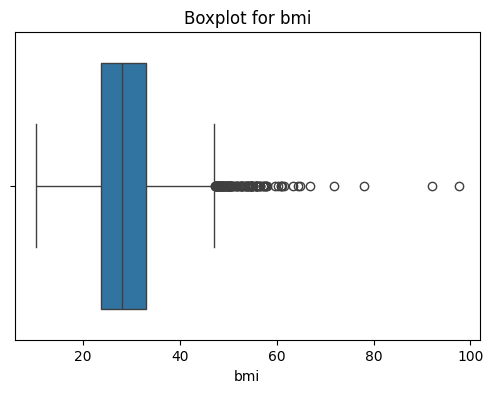

In [9]:
# Visualize outliers with boxplots
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Age: No action needed.
# Average Glucose Level: Consider clipping extreme values.
# BMI: Similarly, clip extreme BMI values.


In [10]:
# Clip outliers using IQR method
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)


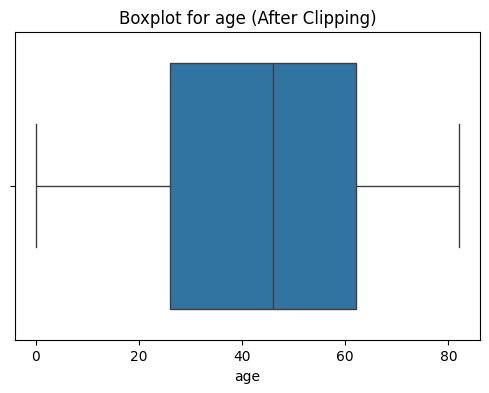

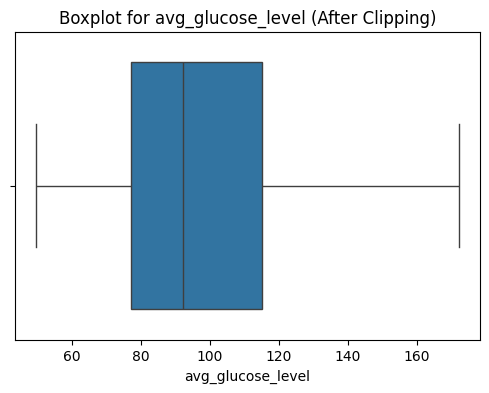

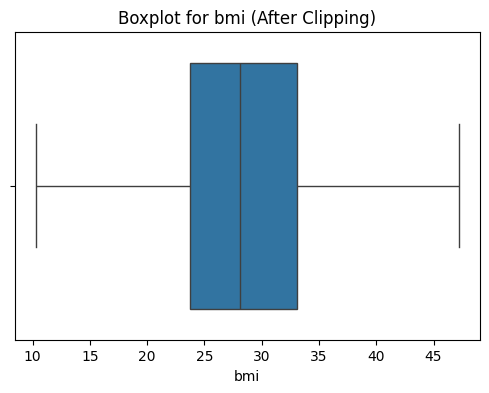

In [11]:
# Check for outliers again (post-clipping)
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col} (After Clipping)')
    plt.show()

In [12]:
categorical_cols = ['gender', 'ever_married', 'Residence_type', 'smoking_status', 'work_type']
for col in categorical_cols:
    # Keep original comment showing what you attempted
    # data[col] = data[col].str.strip().str.lower().str.replace('_', ' ').str.capitalize()
    data[col] = data[col].str.strip().str.lower().str.replace('_', ' ').str.capitalize()


# =========================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# =========================


C:\Users\gzzaw\AppData\Local\Temp\ipykernel_46300\891173390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=data, palette='viridis')


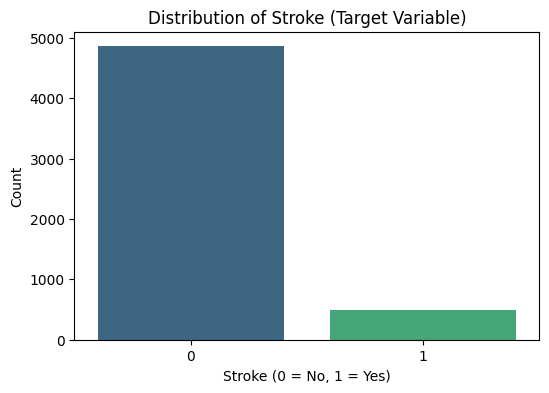

In [13]:

# Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=data, palette='viridis')
plt.title('Distribution of Stroke (Target Variable)')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


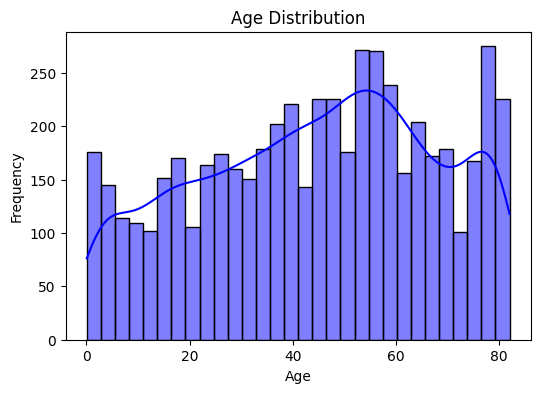

In [14]:
# Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

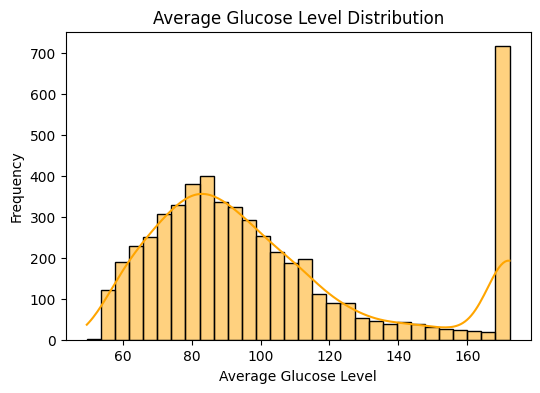

In [16]:
# Average Glucose Level Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['avg_glucose_level'], bins=30, kde=True, color='orange')
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()

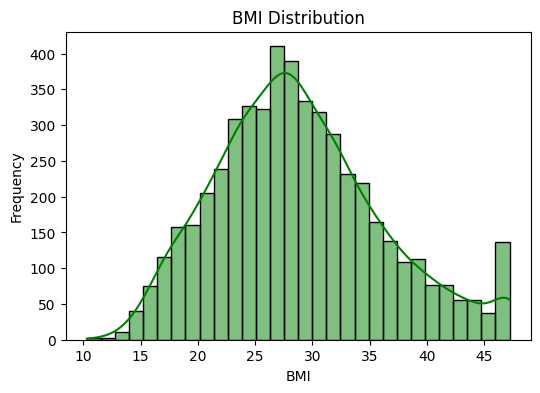

In [17]:
# BMI Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['bmi'], bins=30, kde=True, color='green')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


# =========================
# 5. ENCODING & IMPUTATION
# =========================


In [18]:
# Replace label encoding with one-hot encoding (as per your comment)
data = pd.get_dummies(data, columns=categorical_cols)


In [19]:
# Checking the BMI null values
# "We found that when BMI is null a lot of records had smoking as unknown..." (as per your note).
# Using KNNImputer here

# Filter the data where BMI was originally null
filtered_data = data[data['bmi'].isnull()]

In [22]:
# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer to the dataset
data_imputed = imputer.fit_transform(data)

In [23]:
# Convert the imputed data back to a DataFrame
data = pd.DataFrame(data_imputed, columns=data.columns)



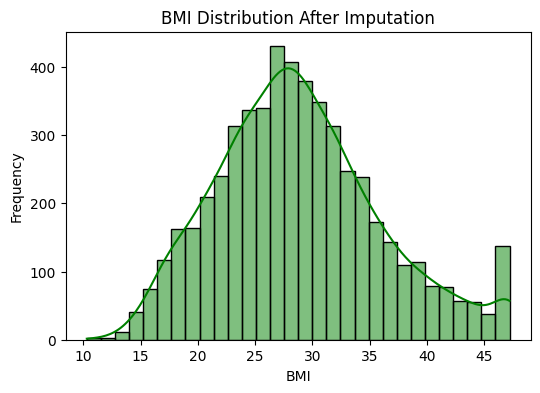

In [24]:
# Check BMI distribution after MICE (original comment references MICE, but KNNImputer is used)
plt.figure(figsize=(6, 4))
sns.histplot(data['bmi'], bins=30, kde=True, color='green')
plt.title('BMI Distribution After Imputation')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Check correlation with stroke
correlation_matrix = data.corr()
print("Correlation with Stroke After Imputation:")
print(correlation_matrix['stroke'].sort_values(ascending=False))


Correlation with Stroke After Imputation:
stroke                            1.000000
age                               0.327436
heart_disease                     0.172797
hypertension                      0.166696
avg_glucose_level                 0.154001
feat01                            0.151337
ever_married_Yes                  0.147214
smoking_status_Formerly smoked    0.086081
work_type_Self-employed           0.082867
bmi                               0.060860
Residence_type_Urban              0.020846
feat08                            0.020654
work_type_Private                 0.016037
gender_Male                       0.012291
smoking_status_Smokes             0.012033
feat07                            0.005553
feat06                            0.005205
feat03                            0.004978
feat05                            0.004677
work_type_Govt job                0.003607
feat04                            0.000756
gender_Other                     -0.004373
smoking_stat

In [26]:
# Separate features and target
X = data.drop(columns=['stroke'])
y = data['stroke']


In [27]:
# Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [29]:
# (Optional) Check the correlation matrix again
correlation_matrix = data.corr()


print("\nCorrelation with 'stroke':")
print(correlation_matrix['stroke'].sort_values(ascending=False))



Correlation with 'stroke':
stroke                            1.000000
age                               0.327436
heart_disease                     0.172797
hypertension                      0.166696
avg_glucose_level                 0.154001
feat01                            0.151337
ever_married_Yes                  0.147214
smoking_status_Formerly smoked    0.086081
work_type_Self-employed           0.082867
bmi                               0.060860
Residence_type_Urban              0.020846
feat08                            0.020654
work_type_Private                 0.016037
gender_Male                       0.012291
smoking_status_Smokes             0.012033
feat07                            0.005553
feat06                            0.005205
feat03                            0.004978
feat05                            0.004677
work_type_Govt job                0.003607
feat04                            0.000756
gender_Other                     -0.004373
smoking_status_Never smoke

In [ ]:
# Keep your original check for some unknown feat01 column
# Check if feat01 values have been modified
# print("feat01 Column Stats Before Correlation Calculation:")
# print(data['feat01'].describe())
# correlation_matrix = data.corr()
# print("Correlation with feat01:")
# print(correlation_matrix['feat01'])

# =========================
# 6. TRAIN-TEST SPLIT
# =========================


In [30]:

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [31]:
# Keep your repeated comment about applying SMOTETomek or ADASYN
# from imblearn.combine import SMOTETomek
# Apply SMOTE with Tomek Links
smote_tomek = ADASYN(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)


# =========================
# 7. CUSTOM FUNCTION FOR BEST F1 THRESHOLD
# =========================

In [32]:
def best_threshold_for_f1(model, X, y_true, pos_label=1):
    """
    Given a fitted model, features X, and true labels y_true,
    find the probability threshold that maximizes F1 for the minority class.
    """
    y_scores = model.predict_proba(X)[:, 1]  # probabilities for positive class
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores, pos_label=pos_label)
    
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
    best_idx = np.argmax(f1_scores)
    best_thresh = thresholds[best_idx]
    best_f1 = f1_scores[best_idx]
    return best_thresh, best_f1


# =========================
# 8. (COMMENTED CODE) STACKING MODEL SECTION
# =========================

In [33]:
# This code references a 'best_stack_model' which is not defined above.
# Preserved as-is per your request to keep all original commentary/code.

"""
threshold_stack, best_f1_stack = best_threshold_for_f1(best_stack_model, X_test, y_test)
print(f"\\nBest Threshold for Stacking Model: {threshold_stack:.3f}, F1={best_f1_stack:.3f}")

y_scores_stack = best_stack_model.predict_proba(X_test)[:, 1]
y_pred_stack_custom = (y_scores_stack >= threshold_stack).astype(int)

print("Stacking Classifier Report (Custom Threshold):")
print(classification_report(y_test, y_pred_stack_custom))
"""


'\nthreshold_stack, best_f1_stack = best_threshold_for_f1(best_stack_model, X_test, y_test)\nprint(f"\\nBest Threshold for Stacking Model: {threshold_stack:.3f}, F1={best_f1_stack:.3f}")\n\ny_scores_stack = best_stack_model.predict_proba(X_test)[:, 1]\ny_pred_stack_custom = (y_scores_stack >= threshold_stack).astype(int)\n\nprint("Stacking Classifier Report (Custom Threshold):")\nprint(classification_report(y_test, y_pred_stack_custom))\n'

# =========================
# 9. RANDOM FOREST PIPELINE + GRID SEARCH
# =========================

In [34]:
# Example hyperparameter space for Random Forest
param_grid_rf = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 20, None],
    'clf__class_weight': [
        {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, 
        {0:1, 1:8}, {0:1, 1:10}, 'balanced'
    ]
}


In [35]:
# Build pipeline
rf_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('resample', SMOTETomek(random_state=42)),  # or SMOTE(), ADASYN(), etc.
    ('clf', RandomForestClassifier(random_state=42))
])

In [36]:
# Stratified cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [37]:
# Grid Search CV for RF
grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_rf,
    scoring=f1_minority,  # focus on minority class F1
    cv=skf,
    n_jobs=-1,
    verbose=1
)

In [39]:
# Fit the grid search on resampled data
grid_search_rf.fit(X_resampled, y_resampled)

print("Best Params (Random Forest):", grid_search_rf.best_params_)
print("Best F1 (minority class) on CV:", grid_search_rf.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Params (Random Forest): {'clf__class_weight': {0: 1, 1: 3}, 'clf__max_depth': None, 'clf__n_estimators': 200}
Best F1 (minority class) on CV: 0.9577158956691892


In [40]:

best_rf = grid_search_rf.best_estimator_

# Retrain best RF pipeline on entire resampled training set
best_rf.fit(X_resampled, y_resampled)

# Predict on test set
y_pred_rf = best_rf.predict(X_test)

print("\nRandom Forest Test Set Classification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       972
         1.0       0.48      0.41      0.44       100

    accuracy                           0.90      1072
   macro avg       0.71      0.68      0.70      1072
weighted avg       0.90      0.90      0.90      1072



# =========================
# 10. XGBOOST PIPELINE + GRID SEARCH
# =========================

In [41]:
# Example hyperparameter space for XGBoost
param_grid_xgb = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 6],
    'clf__learning_rate': [0.01, 0.1],
    'clf__scale_pos_weight': [1, 5, 10]  # Adjust to handle class imbalance
}

xgb_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('resample', SMOTETomek(random_state=42)),  # or SMOTE(), ADASYN(), etc.
    ('clf', XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

grid_search_xgb = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid_xgb,
    scoring=f1_minority,
    cv=skf,
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_resampled, y_resampled)

print("Best Params (XGBoost):", grid_search_xgb.best_params_)
print("Best F1 (minority class) on CV:", grid_search_xgb.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\gzzaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gzzaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gzzaw\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "c:\Users\gzzaw\AppData\Local\Programs\Python\Python310\lib\s

Best Params (XGBoost): {'clf__learning_rate': 0.1, 'clf__max_depth': 6, 'clf__n_estimators': 200, 'clf__scale_pos_weight': 1}
Best F1 (minority class) on CV: 0.9509450467884253


In [42]:

best_xgb = grid_search_xgb.best_estimator_

# Retrain on entire resampled data
best_xgb.fit(X_resampled, y_resampled)

# Predict on test
y_pred_xgb = best_xgb.predict(X_test)

print("\nXGBoost Test Set Classification Report:")
print(classification_report(y_test, y_pred_xgb))

c:\Users\gzzaw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [12:37:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       972
         1.0       0.48      0.51      0.49       100

    accuracy                           0.90      1072
   macro avg       0.71      0.73      0.72      1072
weighted avg       0.91      0.90      0.90      1072



# =========================
# 11. CUSTOM THRESHOLD TUNING ON TEST SET
# =========================


In [43]:
# Random Forest custom threshold
rf_threshold, rf_f1 = best_threshold_for_f1(best_rf, X_test, y_test)
print(f"\nBest Threshold for RF: {rf_threshold:.3f}, F1={rf_f1:.3f}")

rf_probs = best_rf.predict_proba(X_test)[:,1]
y_pred_custom_rf = (rf_probs >= rf_threshold).astype(int)

print("RF Classification Report (Custom Threshold):")
print(classification_report(y_test, y_pred_custom_rf))

# XGBoost custom threshold
xgb_threshold, xgb_f1 = best_threshold_for_f1(best_xgb, X_test, y_test)
print(f"\nBest Threshold for XGB: {xgb_threshold:.3f}, F1={xgb_f1:.3f}")

xgb_probs = best_xgb.predict_proba(X_test)[:,1]
y_pred_custom_xgb = (xgb_probs >= xgb_threshold).astype(int)

print("XGBoost Classification Report (Custom Threshold):")
print(classification_report(y_test, y_pred_custom_xgb))



Best Threshold for RF: 0.425, F1=0.498
RF Classification Report (Custom Threshold):
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       972
         1.0       0.43      0.59      0.50       100

    accuracy                           0.89      1072
   macro avg       0.69      0.75      0.72      1072
weighted avg       0.91      0.89      0.90      1072


Best Threshold for XGB: 0.331, F1=0.530
XGBoost Classification Report (Custom Threshold):
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94       972
         1.0       0.44      0.66      0.53       100

    accuracy                           0.89      1072
   macro avg       0.70      0.79      0.73      1072
weighted avg       0.91      0.89      0.90      1072



# =========================
# 12. CROSS-VALIDATION HELPER FOR THRESHOLD TUNING
# =========================


In [44]:
def cross_val_threshold_tuning(model, X, y, n_splits=5, pos_label=1, random_state=42):
    """
    Perform Stratified K-Fold cross-validation to find the threshold
    that maximizes F1 for the minority class on each fold.
    Computes average threshold, F1, AUC, and Balanced Accuracy across folds.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    thresholds = []
    f1_scores_fold = []
    balanced_acc_scores_fold = []
    auc_scores_fold = []
    folds_info = []
    
    for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        # Fit model on this fold's training data
        model.fit(X_train_fold, y_train_fold)

        # Predicted probabilities for positive class
        y_probs_val = model.predict_proba(X_val_fold)[:, 1]

        # 1. Find best threshold to maximize F1
        precisions, recalls, thresholds_ = precision_recall_curve(y_val_fold, y_probs_val, pos_label=pos_label)
        f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
        
        best_idx = np.argmax(f1s)
        best_threshold_fold = thresholds_[best_idx]
        best_f1_fold = f1s[best_idx]

        # 2. Compute AUC (threshold-independent)
        auc_fold = roc_auc_score(y_val_fold, y_probs_val)

        # 3. Balanced Accuracy & F1 at best threshold
        y_pred_fold = (y_probs_val >= best_threshold_fold).astype(int)
        balanced_acc_fold = balanced_accuracy_score(y_val_fold, y_pred_fold)
        
        # Store fold results
        thresholds.append(best_threshold_fold)
        f1_scores_fold.append(best_f1_fold)
        balanced_acc_scores_fold.append(balanced_acc_fold)
        auc_scores_fold.append(auc_fold)
        
        folds_info.append({
            'fold': fold_idx,
            'best_threshold': best_threshold_fold,
            'f1': best_f1_fold,
            'balanced_acc': balanced_acc_fold,
            'auc': auc_fold
        })
    
    # Aggregate
    avg_threshold = np.mean(thresholds)
    avg_f1 = np.mean(f1_scores_fold)
    avg_bal_acc = np.mean(balanced_acc_scores_fold)
    avg_auc = np.mean(auc_scores_fold)
    
    return {
        'avg_threshold': avg_threshold,
        'avg_f1': avg_f1,
        'avg_balanced_acc': avg_bal_acc,
        'avg_auc': avg_auc,
        'folds_info': folds_info
    }

In [45]:
# Example usage (assuming best_rf is a pipeline or classifier you want to evaluate)
results_rf = cross_val_threshold_tuning(best_rf, X_train, y_train, n_splits=5)

print("Cross-Val Results for Random Forest:")
print(f"Average Threshold:     {results_rf['avg_threshold']:.3f}")
print(f"Average F1 (minority): {results_rf['avg_f1']:.3f}")
print(f"Average Balanced Acc:  {results_rf['avg_balanced_acc']:.3f}")
print(f"Average AUC:           {results_rf['avg_auc']:.3f}")

for info in results_rf['folds_info']:
    print(f"Fold {info['fold']}: threshold={info['best_threshold']:.3f}, "
          f"F1={info['f1']:.3f}, BalAcc={info['balanced_acc']:.3f}, AUC={info['auc']:.3f}")


Cross-Val Results for Random Forest:
Average Threshold:     0.323
Average F1 (minority): 0.410
Average Balanced Acc:  0.751
Average AUC:           0.847
Fold 1: threshold=0.335, F1=0.393, BalAcc=0.718, AUC=0.845
Fold 2: threshold=0.335, F1=0.447, BalAcc=0.788, AUC=0.847
Fold 3: threshold=0.270, F1=0.393, BalAcc=0.769, AUC=0.848
Fold 4: threshold=0.345, F1=0.433, BalAcc=0.759, AUC=0.871
Fold 5: threshold=0.330, F1=0.382, BalAcc=0.721, AUC=0.823



# =========================
# 13. FINAL EVALUATION ON TEST USING AVERAGE CV THRESHOLD
# =========================

In [47]:

# 1. Retrain the model on all training data
best_rf.fit(X_train, y_train)

# 2. Get predicted probabilities on test set
rf_probs_test = best_rf.predict_proba(X_test)[:, 1]

# 3. Apply the average best threshold from cross-validation
best_thresh_from_cv = results_rf['avg_threshold']
y_pred_test_custom = (rf_probs_test >= best_thresh_from_cv).astype(int)


In [48]:
# 4. Evaluate
print("\nFinal Test Evaluation (using avg best threshold from CV):")
print(classification_report(y_test, y_pred_test_custom))

test_auc = roc_auc_score(y_test, rf_probs_test)
test_bal_acc = balanced_accuracy_score(y_test, y_pred_test_custom)
print(f"AUC: {test_auc:.3f}")
print(f"Balanced Accuracy: {test_bal_acc:.3f}")



Final Test Evaluation (using avg best threshold from CV):
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91       972
         1.0       0.33      0.72      0.45       100

    accuracy                           0.84      1072
   macro avg       0.65      0.79      0.68      1072
weighted avg       0.91      0.84      0.86      1072

AUC: 0.873
Balanced Accuracy: 0.785


In [49]:
# Repeat the cross-val threshold tuning for XGBoost if desired
results_xgb = cross_val_threshold_tuning(best_xgb, X_train, y_train, n_splits=5)
print("\nCross-Val Results for XGBoost:")
print(f"Average Threshold:     {results_xgb['avg_threshold']:.3f}")
print(f"Average F1 (minority): {results_xgb['avg_f1']:.3f}")
print(f"Average Balanced Acc:  {results_xgb['avg_balanced_acc']:.3f}")
print(f"Average AUC:           {results_xgb['avg_auc']:.3f}")


c:\Users\gzzaw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [12:38:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\gzzaw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [12:38:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\gzzaw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [12:38:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are


Cross-Val Results for XGBoost:
Average Threshold:     0.312
Average F1 (minority): 0.425
Average Balanced Acc:  0.742
Average AUC:           0.851


In [50]:
# Retrain on full training data
best_xgb.fit(X_train, y_train)
xgb_probs_test = best_xgb.predict_proba(X_test)[:, 1]


c:\Users\gzzaw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [12:39:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [52]:

best_thresh_from_cv_xgb = results_xgb['avg_threshold']
y_pred_test_xgb_custom = (xgb_probs_test >= best_thresh_from_cv_xgb).astype(int)

print("\nFinal Test Evaluation (XGB, using avg best threshold from CV):")
print(classification_report(y_test, y_pred_test_xgb_custom))



Final Test Evaluation (XGB, using avg best threshold from CV):
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       972
         1.0       0.41      0.68      0.52       100

    accuracy                           0.88      1072
   macro avg       0.69      0.79      0.72      1072
weighted avg       0.91      0.88      0.89      1072



In [53]:

test_auc_xgb = roc_auc_score(y_test, xgb_probs_test)
test_bal_acc_xgb = balanced_accuracy_score(y_test, y_pred_test_xgb_custom)
print(f"AUC: {test_auc_xgb:.3f}")
print(f"Balanced Accuracy: {test_bal_acc_xgb:.3f}")

AUC: 0.890
Balanced Accuracy: 0.791


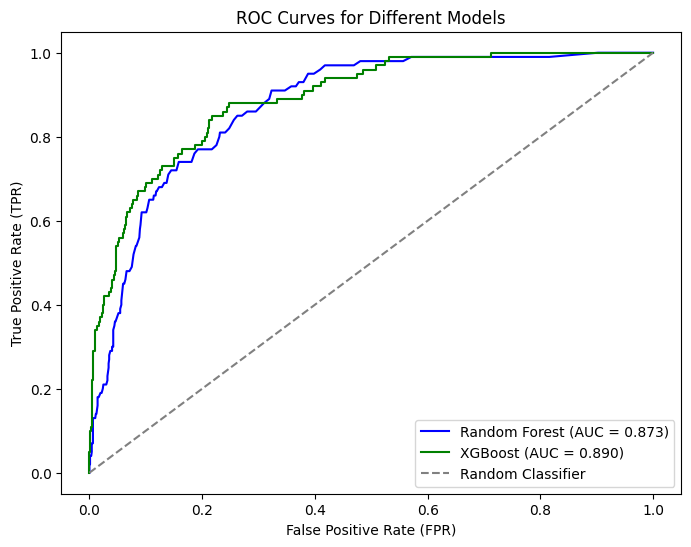

In [54]:

from sklearn.metrics import roc_curve

# 1. Compute ROC curves for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs_test)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs_test)

# 2. Plot all ROC curves in one plot
plt.figure(figsize=(8, 6))

# Plot Random Forest ROC curve
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {test_auc:.3f})', color='blue')

# Plot XGBoost ROC curve
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {test_auc_xgb:.3f})', color='green')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# Add labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')

# Show the plot
plt.show()